# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [16]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
import os
import numpy as np
import csv

training_file = os.path.expanduser("~/CarND-Traffic-Sign-Classifier-Project/train.p")
testing_file = os.path.expanduser("~/CarND-Traffic-Sign-Classifier-Project/test.p")
sign_names_file = os.path.expanduser("~/CarND-Traffic-Sign-Classifier-Project/signnames.csv")

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

#read sign_names
sign_names=[]
with open(sign_names_file) as f:
    reader = csv.reader(f)
    header=-1
    for row in reader:
        if header==-1:
            header=header+1
            continue  
        element = [int(row[0]),row[1]]
        sign_names.append(element)
        
sign_names.pop(0)
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print(sign_names)

[[1, 'Speed limit (30km/h)'], [2, 'Speed limit (50km/h)'], [3, 'Speed limit (60km/h)'], [4, 'Speed limit (70km/h)'], [5, 'Speed limit (80km/h)'], [6, 'End of speed limit (80km/h)'], [7, 'Speed limit (100km/h)'], [8, 'Speed limit (120km/h)'], [9, 'No passing'], [10, 'No passing for vehicles over 3.5 metric tons'], [11, 'Right-of-way at the next intersection'], [12, 'Priority road'], [13, 'Yield'], [14, 'Stop'], [15, 'No vehicles'], [16, 'Vehicles over 3.5 metric tons prohibited'], [17, 'No entry'], [18, 'General caution'], [19, 'Dangerous curve to the left'], [20, 'Dangerous curve to the right'], [21, 'Double curve'], [22, 'Bumpy road'], [23, 'Slippery road'], [24, 'Road narrows on the right'], [25, 'Road work'], [26, 'Traffic signals'], [27, 'Pedestrians'], [28, 'Children crossing'], [29, 'Bicycles crossing'], [30, 'Beware of ice/snow'], [31, 'Wild animals crossing'], [32, 'End of all speed and passing limits'], [33, 'Turn right ahead'], [34, 'Turn left ahead'], [35, 'Ahead only'], [36

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [17]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

12
[12, 'Priority road']


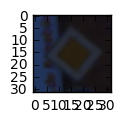

In [18]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])
print(sign_names[y_train[index]-1])


In [19]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_train=X_train.astype(float)
normalize_mean = np.mean(X_train,  axis=(0, 1)) # zero-center
normalize_std = np.std(X_train,  axis=(0, 1)) # normalize
X_train -= normalize_mean # zero-center
X_train /= normalize_std # normalize

#print(normalize_mean)
#print(np.mean(X_train[:,:,2]))

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
First, shuffle the data so as to ensure that the order of the data is irrelevant.
Then, zero-center and normalize all the pixels along each of the three RGB channels. Normalization makes (i) the loss function to be not so big or so small and (ii) helps the optimizer to converge faster as the gradients don't change very differently -in each dimension- in every iteration (i.e. they remain relatively stable).

In [60]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

seed=random.randint(0, 1000)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=seed)

print (len(X_train))
print (len(X_validation))
print (len(y_train))
print (len(y_validation))

31367
7842
31367
7842


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The training data was split into two: 80% assigned to train the network and 20% for cross validation. The test data remains the same as in the test file

In [61]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    cnn1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    cnn1_b = tf.Variable(tf.zeros(6))
    cnn1   = tf.nn.conv2d(x, cnn1_W, strides=[1, 1, 1, 1], padding='VALID') + cnn1_b

    # TODO: Activation.
    cnn1   = tf.nn.relu(cnn1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    cnn1 = tf.nn.max_pool(cnn1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x20.
    cnn2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 20), mean = mu, stddev = sigma))
    cnn2_b = tf.Variable(tf.zeros(20))
    cnn2   = tf.nn.conv2d(cnn1, cnn2_W, strides=[1, 1, 1, 1], padding='VALID') + cnn2_b
      
    # TODO: Activation.
    cnn2   = tf.nn.relu(cnn2)

    # TODO: Pooling. Input = 10x10x20. Output = 5x5x20.
    cnn2 = tf.nn.max_pool(cnn2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x20. Output = 500.
    flat   = flatten(cnn2)
    
    # TODO: Layer 3: Fully Connected. Input = 500. Output = 120.
    fcl1_W = tf.Variable(tf.truncated_normal(shape=(500, 120), mean = mu, stddev = sigma))
    fcl1_b = tf.Variable(tf.zeros(120))
    fcl1   = tf.matmul(flat, fcl1_W) + fcl1_b
    
    # TODO: Activation.
    fcl1   = tf.nn.relu(fcl1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fcl2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fcl2_b = tf.Variable(tf.zeros(84))
    fcl2   = tf.matmul(fcl1, fcl2_W) + fcl2_b
    
    # TODO: Activation.
    fcl2   = tf.nn.relu(fcl2)
    
    #Dropout
    hidden_layer = tf.nn.dropout(fcl2, keep_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fcl3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fcl3_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(fcl2, fcl3_W) + fcl3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
My arqutecture was based on the LeNet arquitecture, changing the input channel from 1 to 3 and the output categories from 10 to 43. Then, I modified the output of the second CNN from 16 to 20, given the network more depth and parameters. And to compensate this extra parameters, I added dropout -with probability 50%- in between layers 4 and 5. 

In [62]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 20
BATCH_SIZE = 256

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.775

EPOCH 2 ...
Validation Accuracy = 0.902

EPOCH 3 ...
Validation Accuracy = 0.949

EPOCH 4 ...
Validation Accuracy = 0.963

EPOCH 5 ...
Validation Accuracy = 0.969

EPOCH 6 ...
Validation Accuracy = 0.970

EPOCH 7 ...
Validation Accuracy = 0.969

EPOCH 8 ...
Validation Accuracy = 0.979

EPOCH 9 ...
Validation Accuracy = 0.974

EPOCH 10 ...
Validation Accuracy = 0.980

EPOCH 11 ...
Validation Accuracy = 0.979

EPOCH 12 ...
Validation Accuracy = 0.979

EPOCH 13 ...
Validation Accuracy = 0.980

EPOCH 14 ...
Validation Accuracy = 0.980

EPOCH 15 ...
Validation Accuracy = 0.983

EPOCH 16 ...
Validation Accuracy = 0.979

EPOCH 17 ...
Validation Accuracy = 0.976

EPOCH 18 ...
Validation Accuracy = 0.982

EPOCH 19 ...
Validation Accuracy = 0.984

EPOCH 20 ...
Validation Accuracy = 0.980

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
The batch size used is 256 with 20 EPOCHs. The sigma of the truncated normal distribution used to initialize weights is 0.1 and the learning rate is 0.001. Finally I used the Adam optimizer to optimize the weights.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
My solution was based on the well known LeNet arquitecture, but the fine tuning was a process of trial and error. Initially I tried a learning rate of 0.001, 10 EPOCHS and 128 Batch size (sigma stayed always 0.1). This gave a validation accuracy of 97.7%. Then I changed the EPOCHS to 20 and compensate decreasing the batch size to 256, giving an accuracy of 98%. Afterwards I modified the learning rate to 0.005, with no relevant difference. In general, all the different combinations I tested stayed relatively stable around 98%, in some EPOCHs iterations increasing to 98.6% and then decreasing. As a result, I finally chose a learning rate of 0.001, 20 EPOCHS and batch size 256. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x30 at 0x15FAAC828>
2880


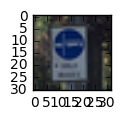

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#importing some useful packages
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import cv2
import sys
from PIL import Image
%matplotlib inline
size = 32, 32

def process_test_image(name):
    image = Image.open(name)
    image.thumbnail(size, Image.ANTIALIAS)
    #image = cv2.imread(name)
    #image = cv2.resize(image,(32, 32))
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

#reading images
image_1 = process_test_image('img_1_speed_bump.jpg')
image_2 = process_test_image('img_2_yield.jpg')
image_3 = process_test_image('img_3_no_left_turn.jpg')
image_4 = process_test_image('img_4_no_stopping.jpg')
image_5 = process_test_image('img_5_only_buses.jpg')
print(image_2)

#plot images
plt.figure(figsize=(1,1))
plt.imshow(image_1)
plt.imshow(image_2)
plt.imshow(image_3)
plt.imshow(image_4)
plt.imshow(image_5)

#normalize images
def normalize_image (image, mean, std):
    image -= mean # zero-center
    image /= std # normalize
    return image
    
#image_1=image_1.astype(float)
#image_2=image_2.astype(float)
#image_3=image_3.astype(float)
#image_4=image_4.astype(float)
#image_5=image_5.astype(float)

image_1_n = normalize_image(image_1, normalize_mean, normalize_std)
image_2_n = normalize_image(image_2, normalize_mean, normalize_std)
image_3_n = normalize_image(image_3, normalize_mean, normalize_std)
image_4_n = normalize_image(image_4, normalize_mean, normalize_std)
image_5_n = normalize_image(image_5, normalize_mean, normalize_std)
print(image_2_n.size)

X_new_images=np.array([image_1_n,image_2_n,image_3_n,image_4_n,image_5_n])

def predictions(X_data):
    sess = tf.get_default_session()
    predicted_class = sess.run(tf.argmax(logits, 1), feed_dict={x: X_data,keep_prob: 1})
    return predicted_class

def top_softmax_probabilities(X_data):
    sess = tf.get_default_session()
    top_probs = sess.run(tf.nn.top_k(tf.nn.softmax(logits),5), feed_dict={x: X_data,keep_prob: 1})
    return top_probs

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I chose five images around my home in Santiago, Chile. The first is a speed bump, the second a yield sign, then a no left turn sign, fourth a sign of not stopping allowed in that section of the road and the fifth is a only buses in right lane. From the five images, the only present in the German database is yield; the other four aren't in the DB -the last two are probably local signs- and I added them to curiously check the output of the network. 

The images were taken with my iphone, and even though I took them with the most possible zoom, the size was far greater than the 32x32 supported by the NNet. So when I resize the image to 32x32 it seems a bit pixeled.

In [80]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

#normalize test set using the mean in the data
X_test = X_test.astype(float)
X_test_n = normalize_image(X_test, normalize_mean, normalize_std)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    #run accuracy on test data set
    test_accuracy = evaluate(X_test_n, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    #get predictions for the images
    new_images_predictions = predictions(X_new_images)
    print("Class predictions for five images:")
    print(new_images_predictions)
    
    #get softmax probabilities
    top_five_predictions  = top_softmax_probabilities(X_new_images)
    

Test Accuracy = 0.031
Class predictions for five images:
[ 9 13 25  1 40]
TopKV2(values=array([[  9.23215032e-01,   7.07330853e-02,   6.04888378e-03,
          1.31671698e-06,   8.03520152e-07],
       [  1.00000000e+00,   1.76214553e-15,   3.82916596e-16,
          4.67076830e-17,   5.00834183e-19],
       [  9.98627067e-01,   1.08249160e-03,   2.46379088e-04,
          2.71253211e-05,   6.84409815e-06],
       [  9.99998689e-01,   1.36642791e-06,   1.53166889e-11,
          8.74776900e-12,   9.73624190e-14],
       [  1.00000000e+00,   1.15584459e-10,   2.33428138e-11,
          8.85635055e-12,   8.93918931e-15]], dtype=float32), indices=array([[ 9, 20, 17, 18, 27],
       [13, 15,  3,  9, 35],
       [25, 21, 40,  2, 37],
       [ 1,  0,  5,  4,  7],
       [40, 41, 16, 36,  7]], dtype=int32))


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The only image that had a label from the German database was the yield image, which was correctly predicted by the NNet (image 2 with class 13). The speed bump was confused with a no passing sign, the no left turn sign was mistaken with a road work, the no stopping  with speed limit 30km/h and the only bus in right lane with the roundabout mandatory.

In [81]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
print(top_five_predictions)

TopKV2(values=array([[  9.23215032e-01,   7.07330853e-02,   6.04888378e-03,
          1.31671698e-06,   8.03520152e-07],
       [  1.00000000e+00,   1.76214553e-15,   3.82916596e-16,
          4.67076830e-17,   5.00834183e-19],
       [  9.98627067e-01,   1.08249160e-03,   2.46379088e-04,
          2.71253211e-05,   6.84409815e-06],
       [  9.99998689e-01,   1.36642791e-06,   1.53166889e-11,
          8.74776900e-12,   9.73624190e-14],
       [  1.00000000e+00,   1.15584459e-10,   2.33428138e-11,
          8.85635055e-12,   8.93918931e-15]], dtype=float32), indices=array([[ 9, 20, 17, 18, 27],
       [13, 15,  3,  9, 35],
       [25, 21, 40,  2, 37],
       [ 1,  0,  5,  4,  7],
       [40, 41, 16, 36,  7]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The yield sign was predicted right with a probability of 1. What is also interesting is that the other images, which didn't exist in the training database, were predicted with a high level of certainty (in some cases with a softmax probability of 1).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.